<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# Unsupervised ML in Power BI using PyCaret

<center><img src="https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png" width="250" height="200" /></center>

## Table of Contents


1.0. [Installing PyCaret](#section100)<br>
1.1. [Pre-Requisites](#section101)<br>
2.0. [What is Clustering?](#section200)<br>
3.0. [Overview of Clustering with PyCaret](#section300)<br>
4.0. [Dataset of the tutorial](#section400)<br>
5.0. [Getting the Data](#section500)<br>
6.0. [Setting up environment in PyCaret](#section600)<br>
7.0. [Create a model](#section700)<br>
8.0. [Assign a model](#section800)<br>
9.0. [Plot a model](#section900)<br>
10.0. [Predict on unseen data](#section1000)<br>
11.0. [Saving the model](#section1100)<br>
12.0. [Loading the model](#section1200)<br>



## 1.1 Installing PyCaret
The first step to get started with PyCaret is to install pycaret. Installation is easy and will only take a few minutes. Follow the instructions below:

#### Installing PyCaret in Local Jupyter Notebook
`pip install pycaret`  <br />

#### Installing PyCaret on Google Colab or Azure Notebooks
`!pip install pycaret`


## 1.2 Pre-Requisites
- Python 3.x
- Latest version of pycaret
- Internet connection to load data from pycaret's repository
- Basic Knowledge of Clustering

In [1]:
!pip install pycaret

You should consider upgrading via the 'c:\users\lenovo\anaconda3\python.exe -m pip install --upgrade pip' command.


## 2.0 What is Clustering?
Clustering is the task of grouping a set of objects in such a way that those in the same group (called a cluster) are more similar to each other than to those in other groups. Some common real life use cases of clustering are:

- Customer segmentation based on purchase history or interests to design targetted marketing compaigns.


- Cluster documents into multiple categories based on tags, topics, and the content of the document.


- Analysis of outcome in social / life science experiments to find natural groupings and patterns in the data.


## 3.0 Overview of Clustering Module in PyCaret
- PyCaret's clustering module (`pycaret.clustering`) is a an unsupervised machine learning module which performs the task of grouping a set of objects in such a way that those in the same group (called a cluster) are more similar to each other than to those in other groups. 


- PyCaret's clustering module provides several pre-processing features that can be configured when initializing the setup through the `setup()` function. It has over 8 algorithms and several plots to analyze the results.

## 4.0 Problem Statement

We will use the current health expenditure dataset from the World Health Organization’s Global Health Expenditure database. The dataset contains health expenditure as a % of National GDP for over 150 countries from year 2000 through 2017. Our objective is to group countries having similar pattens in this data by using K-Means Clustering algorithm.

<center><img src="https://www.investopedia.com/thmb/TMoeAs2fSgRo7_TMADBgA1oYcy0=/500x325/filters:no_upscale():max_bytes(150000):strip_icc()/us-healthcare-costs-56a749eb3df78cf772941acc.jpg" width="500" height="100" /></center>

## 5.0 Getting the Data

In [1]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/clustering.csv')
dataset.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.0926,0.0940,0.0944,0.0894,0.0981,0.0995,0.1062,0.0990,0.1026,0.0982,0.0857,0.0856,0.0790,0.0881,0.0953,0.1011,0.1096,0.1178
1,Angola,0.0191,0.0448,0.0333,0.0355,0.0397,0.0285,0.0269,0.0297,0.0332,0.0384,0.0270,0.0265,0.0240,0.0273,0.0243,0.0261,0.0271,0.0279
2,Andorra,0.0935,0.0936,0.0912,0.0846,0.0821,0.0857,0.0843,0.0843,0.0879,0.0903,0.0945,0.0977,0.1005,0.1011,0.1028,0.1025,0.1032,0.1032
3,United Arab Emirates,0.0237,0.0248,0.0272,0.0265,0.0246,0.0232,0.0233,0.0257,0.0293,0.0405,0.0388,0.0367,0.0343,0.0359,0.0363,0.0358,0.0340,0.0333
4,Argentina,0.0847,0.0862,0.0765,0.0711,0.0723,0.0761,0.0755,0.0761,0.0767,0.0901,0.0861,0.0840,0.0846,0.0837,0.0826,0.0879,0.0754,0.0912


| Id | Features | Description |
| :--| :--| :--|
|01|**Country**|Name of the Country|
|02|**Years**|Year from 2000 to 2017|

In [2]:
#check the shape of data
dataset.shape

(190, 19)

- In order to demonstrate the predict_model() function on unseen data, a sample of 20% (38) has been withheld from the original dataset to be used for predictions at the end of experiment. 

In [3]:
data = dataset.sample(frac=0.80, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (152, 19)
Unseen Data For Predictions: (38, 19)


## 6.0 Setting up Environment in PyCaret

- The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. 


- setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column.

In [4]:
from pycaret.clustering import *

In [5]:
clu = setup(data, normalize = True, session_id=897)

Setup Succesfully Completed!


,Description,Value
0,session_id,897
1,Original Data,"(152, 19)"
2,Missing Values,False
3,Numeric Features,17
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(152, 170)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. 

A few important things to note at this stage include:

- **session_id**: A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 897 for later reproducibility.


- **Missing Values**: When there are missing values in original data this will show as True. Notice that Missing Values in the information grid above is True as the data contains missing values which are automatically imputed using mean for numeric features and constant for categorical features.


- **Original Data**: Displays the original shape of dataset. 


- **Numeric Features**: The number of features inferred as numeric. 


- **Categorical Features**: The number of features inferred as categorical.


## 7.0 Create a Model

Creating a cluster model in PyCaret is simple and similar to how you would create a model in the supervised learning modules. A clustering model is created using the create_model() function which takes one mandatory parameter: the name of model as a string. This function returns a trained model object.

In [6]:
kmeans = create_model('kmeans', num_clusters=5)

,Metric
Silhouette,0.2745
Calinski-Harabasz,132.8896
Davies-Bouldin,1.0987


In [7]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=897, tol=0.0001, verbose=0)


We have created a kmeans model using create_model(). Notice the n_clusters parameter is set to 4 which is the default when you do not pass a value to the num_clusters parameter.

## 8.0 Assign a Model

Now that we have created a model, we would like to assign the cluster labels to our dataset (1080 samples) to analyze the results. We will achieve this by using the `assign_model()` function. See an example below:

In [8]:
kmean_results = assign_model(kmeans)
kmean_results.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Cluster
0,Italy,0.0758,0.0777,0.0789,0.0786,0.0819,0.0836,0.0846,0.0816,0.0856,0.0898,0.0895,0.0883,0.0896,0.0895,0.0901,0.0899,0.0888,0.0884,Cluster 1
1,Chad,0.0546,0.0529,0.0727,0.0551,0.0550,0.0484,0.0487,0.0434,0.0406,0.0444,0.0406,0.0391,0.0386,0.0407,0.0427,0.0452,0.0496,0.0449,Cluster 0
2,Paraguay,0.0550,0.0504,0.0419,0.0430,0.0423,0.0408,0.0423,0.0418,0.0416,0.0447,0.0462,0.0505,0.0654,0.0607,0.0665,0.0675,0.0673,0.0665,Cluster 0
3,Lao PDR,0.0428,0.0429,0.0370,0.0448,0.0354,0.0334,0.0293,0.0315,0.0277,0.0346,0.0291,0.0194,0.0208,0.0240,0.0230,0.0245,0.0236,0.0253,Cluster 4
4,Guyana,0.0389,0.0402,0.0419,0.0428,0.0486,0.0519,0.0502,0.0518,0.0489,0.0521,0.0546,0.0517,0.0489,0.0505,0.0514,0.0452,0.0514,0.0495,Cluster 0


Notice that a new column called Cluster has been added to the original dataset. kmean_results also includes the MouseID feature that we dropped during the setup() but it was not used for the model and is only appended to the dataset when you use assign_model(). In the next section we will see how to analyze the results of clustering using plot_model().

## 9.0 Plot a Model

### 2D Cluster plot

The plot_model() function can be used to analyze different aspects of the clustering model. This function takes a trained model object and returns a plot.

In [9]:
plot_model(kmeans)

### Elbow Plot

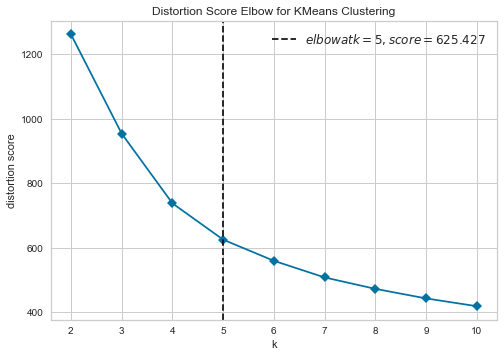

In [10]:
plot_model(kmeans, plot = 'elbow')

### Silhouette Plot

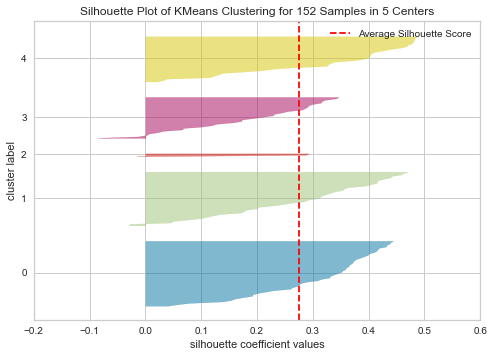

In [11]:
plot_model(kmeans, plot = 'silhouette')

### Observations
- Countries like Nepal, Morocco, Bolivia etc are in cluster 0

- Countries like Brazil, Portugal, Norway etc. are present in Cluster 1

- Countries like US, Tuvalu, Nauru are present in Cluster 2

- Countries like Ukraine, Czech Republic, Colombo etc. are present in Cluster 3

- Countries like Oman, Pakistan, UAE etc. are present in Cluster 4

- From the Elbow plot we can observe that no. of clusters = 5 is best in this case

## 10.0 Predict on unseen data

The predict_model() function is used to assign cluster labels to a new unseen dataset. We will now use our kmeans model to predict the data stored in data_unseen. 

In [12]:
unseen_predictions = predict_model(kmeans, data=data_unseen)
unseen_predictions.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Cluster
0,Solomon Islands,0.0525,0.0704,0.1077,0.0793,0.0859,0.1014,0.0928,0.0875,0.0807,0.0790,0.0726,0.0710,0.0559,0.0550,0.0588,0.0525,0.0517,0.0468,Cluster 3
1,Sierra Leone,0.1152,0.1097,0.1142,0.1083,0.1096,0.1104,0.1039,0.1004,0.0987,0.1110,0.1094,0.1328,0.1059,0.1157,0.1973,0.2041,0.1653,0.1342,Cluster 2
2,El Salvador,0.0892,0.0882,0.0878,0.0841,0.0850,0.0844,0.0792,0.0764,0.0766,0.0840,0.0824,0.0814,0.0754,0.0772,0.0768,0.0763,0.0772,0.0723,Cluster 1
3,San Marino,0.0528,0.0512,0.0497,0.0438,0.0491,0.0493,0.0499,0.0514,0.0545,0.0628,0.0662,0.0744,0.0801,0.0773,0.0757,0.0735,0.0683,0.0736,Cluster 3
4,Serbia,0.0650,0.0687,0.0807,0.0814,0.0825,0.0828,0.0849,0.0938,0.0948,0.0935,0.0953,0.0911,0.0933,0.0931,0.0925,0.0882,0.0865,0.0843,Cluster 1


## 11.0 Saving the model

In [13]:
save_model(kmeans,'Final Kmeans')

Transformation Pipeline and Model Succesfully Saved


## 12.0 Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's load_model() function and then easily apply the saved model on new unseen data for prediction.

In [14]:
saved_kmeans = load_model('Final Kmeans')

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same predict_model() function.

In [15]:
new_prediction = predict_model(saved_kmeans, data=data_unseen)

In [16]:
new_prediction.head()

,Country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Cluster
0,Solomon Islands,0.0525,0.0704,0.1077,0.0793,0.0859,0.1014,0.0928,0.0875,0.0807,0.0790,0.0726,0.0710,0.0559,0.0550,0.0588,0.0525,0.0517,0.0468,Cluster 3
1,Sierra Leone,0.1152,0.1097,0.1142,0.1083,0.1096,0.1104,0.1039,0.1004,0.0987,0.1110,0.1094,0.1328,0.1059,0.1157,0.1973,0.2041,0.1653,0.1342,Cluster 2
2,El Salvador,0.0892,0.0882,0.0878,0.0841,0.0850,0.0844,0.0792,0.0764,0.0766,0.0840,0.0824,0.0814,0.0754,0.0772,0.0768,0.0763,0.0772,0.0723,Cluster 1
3,San Marino,0.0528,0.0512,0.0497,0.0438,0.0491,0.0493,0.0499,0.0514,0.0545,0.0628,0.0662,0.0744,0.0801,0.0773,0.0757,0.0735,0.0683,0.0736,Cluster 3
4,Serbia,0.0650,0.0687,0.0807,0.0814,0.0825,0.0828,0.0849,0.0938,0.0948,0.0935,0.0953,0.0911,0.0933,0.0931,0.0925,0.0882,0.0865,0.0843,Cluster 1


Notice that the results of unseen_predictions and new_prediction are identical.

## 13.0 Demonstration in PowerBI

### 13.0.1 Installation of Power BI

- Please [click here](https://docs.microsoft.com/en-us/power-bi/fundamentals/desktop-get-the-desktop) to know how to install Power BI Desktop in your PC 

### 13.0.2 Introduction to Power BI 

Power BI is a Data Visualization and Business Intelligence tool that converts data from different data sources to interactive dashboards and BI reports

<center><img src="https://senturus.com/wp-content/uploads/2016/05/Power-BI.jpg" width="500" height="100" /></center>

#### Let's have a look at how Power BI works in Microsoft Power BI Desktop 

### 13.0.3 Working on Power BI Service

Once you’ve uploaded the .pbix file to the Power BI service, a couple more steps are necessary to enable seamless integration of the machine learning pipeline into your data pipeline. 

These include:

- **Enable scheduled refresh for the dataset** — to enable a scheduled refresh for the workbook that contains your dataset with Python scripts, see [Configuring scheduled refresh](https://docs.microsoft.com/en-us/power-bi/connect-data/refresh-scheduled-refresh), which also includes information about Personal Gateway.


- **Install the Personal Gateway** — you need a Personal Gateway installed on the machine where the file is located, and where Python is installed; the Power BI service must have access to that Python environment. You can get more information on [how to install and configure Personal Gateway](https://docs.microsoft.com/en-us/power-bi/connect-data/service-gateway-personal-mode).

## 14.0 Conclusions

-  PyCaret is a very useful library that can help you save an ample amount of time taking into account that you have a basic understanding of the concepts in machine learning 


- PyCaret is very easy to use


- Power BI helps in getting insights from the data very easily 